### confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *


confusion matrix is the count matrix which counts the matching times between true class and prected class

In [2]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

### Binary confusion matrix
- the case class has only two value 0,1(binary) then we class the classes 'Positive' and 'Negative'
- if we predict 'Positive'
    - TP , FN
- if we predict 'Negative'
    - TN , FN

### Evaluation Score
- Accuracy : (TP + TN) / (all_components of confusion matrix)
- Precision : (TP)/(TP+FP) -- if users predict some case 'Positive' Precision measures the correct positive prediction ratio
- Recall : (TP) / (TP + FN) -- there is positive real value_true groups(ex. the crimial group) and among them, there are some (not all, and the recall gonna be '1') fraction(ratio) positive prediction(correct prediction) and, the ratio of the prediction among the real value_true group is called Recall
- Fall-out : there is negative real value_false groups and among tehm, there are (not all, and the fall-out gonna be '1') some fraction positive (it is wrong prediction as you know) and this ratio is called fall-out
- As you can notice, (maybe) the relationship between recall and fall-out is 'positive'
- And , there are negative corelation between precision and recall

### F(beta) score
- the weighted harmomic average between 'Precision' and 'Recall'
- `F_beta = (1+beta^2) * ( precision * recall) / (beta^2 * precision + recall)`

### ROC Curve(Receiver Operator Characteristic)
- the change of fall-out and recall as class discriminant criteria change.

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000,weights=[0.9,0.1],random_state=1)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [5]:
model1 =LogisticRegression().fit(X,y)
y_hat1 = model1.predict(X)

In [6]:
model2 =SVC(gamma=0.0026,C=10,probability=True).fit(X,y)
y_hat2 = model2.predict(X)

In [7]:
print(confusion_matrix(y,y_hat1))

[[8853   94]
 [ 397  656]]


In [8]:
print(confusion_matrix(y,y_hat2))

[[8894   53]
 [ 397  656]]


In [12]:
print(classification_report(y,model1.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [13]:
print(classification_report(y,model2.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



In [14]:
from sklearn.metrics import roc_curve

In [15]:
fpr1,tpr1,thresholds1 = roc_curve(y,model1.decision_function(X))
fpr2,tpr2,thresholds1 = roc_curve(y,model2.decision_function(X))

In [17]:
import matplotlib.pylab as plt

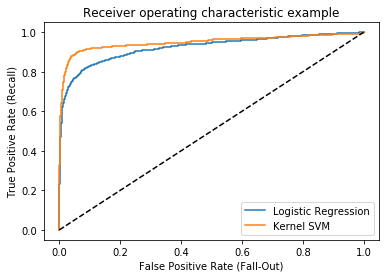

In [18]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

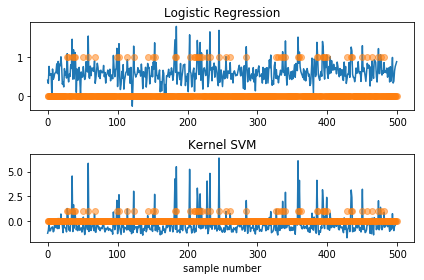

In [19]:
N = 500

plt.subplot(211)
plt.plot(model1.decision_function(X[:N]) * 0.1 + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X[:N]) + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()

### AUC(Area Under the Curve)
- AUC mean the area of ROC Curve. the value goes to 1 as Recall value is larger than Fall-out.

In [20]:
from sklearn.metrics import auc
auc(fpr1,tpr1),auc(fpr2, tpr2)

(0.9227893798140808, 0.9486326091892203)

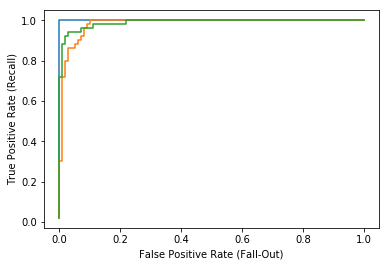

In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()